# Term Project 1

### Student 1: Aidana Bolat A0219532H


In [1]:
import QuantLib as ql
from QuantLib import *
import pandas as pd
import matplotlib.pyplot as plt

## Bootstrapping Yield Curves

In [2]:
#settings
Calendar = ql.UnitedStates()
DayCount=ql.Actual360()
SwapDayCount=ql.Thirty360()
Freq=ql.Semiannual
BusDayConv = ql.ModifiedFollowing
DateGeneration = ql.DateGeneration.Backward
MonthEndFlag = False
EvaluationDate = ql.Date(7,2, 2022)
SpotDate=ql.Date(9,2,2022)
ql.Settings.instance().evaluationDate = EvaluationDate
libor3m=ql.USDLibor(ql.Period(3, ql.Months))
libor6m=ql.USDLibor(ql.Period(6, ql.Months))
libor1m=ql.USDLibor(ql.Period(1, ql.Months))
sofr = ql.OvernightIndex("SOFR", 2, ql.USDCurrency(), Calendar, DayCount)


### Bootstrapping oisCurve

In [3]:
#OIS swap
#input rates
oisRates=[1.6,1.59,1.59,1.59,1.59,1.59,1.59,1.58,1.57,1.51,1.45,1.38,1.22,1.12,1.14,1.15,1.16,1.18,1.21,1.24,1.27,1.31,1.37,1.43,1.45,1.46]
oisPeriods=[ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Weeks),ql.Period(2,Weeks),ql.Period(3,Weeks), ql.Period(1,Months),ql.Period(2,Months),ql.Period(3,Months),ql.Period(6,Months),ql.Period(9,Months),
                              ql.Period(1,Years),ql.Period(2,Years),ql.Period(3,Years),ql.Period(4,Years),ql.Period(5,Years),ql.Period(6,Years),ql.Period(7,Years),ql.Period(8,Years),ql.Period(9,Years),ql.Period(10,Years),ql.Period(12,Years),
                              ql.Period(15,Years),ql.Period(20,Years),ql.Period(25,Years),ql.Period(30,Years)]

startdates1=[Calendar.advance(EvaluationDate,0,ql.Days), Calendar.advance(EvaluationDate,1,ql.Days),Calendar.advance(EvaluationDate,2,ql.Days)]
startdates1+=[Calendar.advance(EvaluationDate,2,ql.Days) for i in range(3,26)]
enddates1=[Calendar.advance(startdates1[i],oisPeriods[i]) for i in range(26)]

#deposit rate helper
helpers1=[ DepositRateHelper(QuoteHandle(SimpleQuote(oisRates[i]/100)),oisPeriods[i], i,TARGET(), ql.Following, False, DayCount)   for i in range(3)]

#OIS rate helper
#up to 1year
helpers1+=[OISRateHelper(2, oisPeriods[i],QuoteHandle(SimpleQuote(oisRates[i]/100)), sofr,paymentFrequency=ql.Once) for  i in range(3,11)]
#beyond 1 year 
helpers1+=[ OISRateHelper(2, oisPeriods[i],QuoteHandle(SimpleQuote(oisRates[i]/100)), sofr,paymentFrequency=ql.Annual) for i in range(11,26) ]

#bootstrapping 
ois_yieldCurve=ql.PiecewiseLogCubicDiscount(EvaluationDate,helpers1,DayCount)

### Bootstrapping Libor3MCurve

In [4]:
#USD 3M Libor curve
#inputs
futures_startDate=[ql.IMM.date('H2',ql.Date(7,2,2022)),ql.IMM.date('M2',ql.Date(7,2,2022)),ql.IMM.date('U2',ql.Date(7,2,2022)),ql.IMM.date('Z2',ql.Date(7,2,2022)),
           ql.IMM.date('H3',ql.Date(7,2,2022)),ql.IMM.date('M3',ql.Date(7,2,2022)),ql.IMM.date('U3',ql.Date(7,2,2022)),ql.IMM.date('Z3',ql.Date(7,2,2022))]

rates2=[1.75, 1.75, 1.75,1.75,1.75,1.75,1.75,1.75,1.75,98.35, 98.47 ,98.60, 98.64, 98.75, 98.79,98.81, 98.78,1.34,1.33,1.33,1.35,1.37,1.4,1.43,1.46,1.51,1.57,1.63,1.65,1.66]
periods2=[ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Weeks),ql.Period(2,Weeks),ql.Period(3,Weeks),ql.Period(1,Months),ql.Period(2,Months),ql.Period(3,Months),ql.Period(3,Months),ql.Period(3,Months),ql.Period(3,Months),ql.Period(3,Months),ql.Period(3,Months),ql.Period(3,Months),ql.Period(3,Months),ql.Period(3,Months),
          ql.Period(3,Years),ql.Period(4,Years),ql.Period(5,Years),ql.Period(6,Years),ql.Period(7,Years),ql.Period(8,Years),ql.Period(9,Years),ql.Period(10,Years),ql.Period(12,Years),ql.Period(15,Years),ql.Period(20,Years),ql.Period(25,Years),ql.Period(30,Years)]

startdates2=[Calendar.advance(EvaluationDate,0,ql.Days), Calendar.advance(EvaluationDate,1,ql.Days),Calendar.advance(EvaluationDate,2,ql.Days)]
startdates2+=[Calendar.advance(EvaluationDate,2,ql.Days) for i in range(3,9)]
startdates2+=[Calendar.advance(futures_startDate[i],2,ql.Days) for i in range(8)]
startdates2+=[Calendar.advance(EvaluationDate,2,ql.Days) for i in range(13)]
enddates2=[Calendar.advance(startdates2[i],periods2[i]) for i in range(30)]

#discounting curve for Libor instruments

discountingCurve=YieldTermStructureHandle(ois_yieldCurve)
#deposit rate helpers
helpers2=[ql.DepositRateHelper(QuoteHandle(SimpleQuote(rates2[i]/100)),periods2[i], i,TARGET(), ql.Following, MonthEndFlag, DayCount) for i in range(3)]
helpers2+=[ql.DepositRateHelper(QuoteHandle(SimpleQuote(rates2[i]/100)), periods2[i], 2, ql.TARGET(), ql.Following,MonthEndFlag, DayCount) for  i in range(3,9)]

#futures rate helper
helpers2+=[ql.FuturesRateHelper(rates2[i+9], futures_startDate[i], libor3m, 0,  ql.Futures.IMM) for i in range(8) ]

#swap rates helper
helpers2+=[ql.SwapRateHelper(QuoteHandle(SimpleQuote(rates2[i+17]/100)), periods2[i+17], Calendar, Freq, BusDayConv, SwapDayCount,
                             libor3m,ql.QuoteHandle(),ql.Period(0,ql.Days), discountingCurve) for i in range(13)]

#bootstrapping
usdlibor3m_yieldCurve=ql.PiecewiseLogCubicDiscount(EvaluationDate,helpers2,DayCount)


### Bootstrapping Libor1m/3mCurve

In [5]:
#USD 1m/3m libor
#inputs
tenorRates13=[1.75, 1.75, 1.75,1.75,1.75,1.34,1.33,1.33,1.37,1.46,1.51,1.57,1.63,1.65,1.66]
tenorSpreads13=[15,12,10,9,8,8,8,8,8,8,8,8,8,8,8]
tenorPeriods13=[ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Weeks),ql.Period(2,Weeks),
                              ql.Period(3,Years),ql.Period(4,Years),ql.Period(5,Years),ql.Period(7,Years),ql.Period(10,Years),
                              ql.Period(12,Years),ql.Period(15,Years),ql.Period(20,Years),ql.Period(25,Years),ql.Period(30,Years)]

startdates3=[Calendar.advance(EvaluationDate,0,ql.Days), Calendar.advance(EvaluationDate,1,ql.Days),Calendar.advance(EvaluationDate,2,ql.Days)]
startdates3+=[Calendar.advance(EvaluationDate,2,ql.Days) for i in range(3,15)]
enddates3=[Calendar.advance(startdates3[i],tenorPeriods13[i]) for i in range(15)]

#deposit rate and swaprate helpers
helpers3=[ql.DepositRateHelper(QuoteHandle(SimpleQuote(tenorRates13[i]/100-tenorSpreads13[i]/10000)),ql.Period(1,Days), i, TARGET(), ql.Following, MonthEndFlag, DayCount) for i in range(3)]
helpers3+=[ql.SwapRateHelper(QuoteHandle(SimpleQuote(tenorRates13[i]/100-tenorSpreads13[i]/10000)), tenorPeriods13[i], Calendar,ql.Annual, BusDayConv, SwapDayCount,
                          libor1m,ql.QuoteHandle(),ql.Period(0,ql.Days), discountingCurve)   for i in range(3,15)]

#bootstrapping
tenor13_yieldCurve=ql.PiecewiseLogCubicDiscount(EvaluationDate,helpers3,DayCount)

### Bootstrapping Libor3m/6mCurve

In [6]:
#USD 3m/6m libor
#inputs
tenorRates36=[1.75, 1.75, 1.75,1.75,1.75,1.34,1.33,1.33,1.37,1.46,1.51,1.57,1.63,1.65,1.66]

tenorSpreads36=[20,15,12,11,10,10,10,10,10,10,10,10,10,10,10]
tenorPeriods36=[ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Weeks),ql.Period(2,Weeks),
                              ql.Period(3,Years),ql.Period(4,Years),ql.Period(5,Years),ql.Period(7,Years),ql.Period(10,Years),
                              ql.Period(12,Years),ql.Period(15,Years),ql.Period(20,Years),ql.Period(25,Years),ql.Period(30,Years)]

startdates4=[Calendar.advance(EvaluationDate,0,ql.Days), Calendar.advance(EvaluationDate,1,ql.Days),Calendar.advance(EvaluationDate,2,ql.Days)]
startdates4+=[Calendar.advance(EvaluationDate,2,ql.Days) for i in range(3,15)]
enddates4=[Calendar.advance(startdates4[i],tenorPeriods36[i]) for i in range(15)]

#deposit rate and swaprate helpers
helpers4=[ql.DepositRateHelper(QuoteHandle(SimpleQuote(tenorRates36[i]/100+tenorSpreads36[i]/10000)),ql.Period(1,Days), i, TARGET(), ql.Following, MonthEndFlag, DayCount) for i in range(3)]
helpers4+=[ql.SwapRateHelper(QuoteHandle(SimpleQuote(tenorRates36[i]/100+tenorSpreads36[i]/10000)), tenorPeriods36[i], Calendar, ql.Annual, BusDayConv, SwapDayCount,
                          libor6m,ql.QuoteHandle(),ql.Period(0,ql.Days), discountingCurve) for i in range(3,15)]
#bootstrapping
tenor36_yieldCurve=ql.PiecewiseLogCubicDiscount(EvaluationDate,helpers4,DayCount)

### Yield Curves Summary and Plots

In [7]:
#function gets forward rates
def forwardrates(yieldcurve,day_count, Calendar,ind,months):
    spot = yieldcurve.referenceDate()
    dates = [ spot+Period(i,Months) for i in range(0, months) ]
    yrs=[i/12 for i in range (months)]
    rates = [100* yieldcurve.forwardRate(d, ind.maturityDate(d),day_count, ql.Simple).rate() for d in dates ]
    return pd.DataFrame(zip(yrs,rates),columns=['Maturities','Curve'], index=['']*len(dates))

#function gets zero rates
def zerorates(yieldcurve, day_count,Calendar, months):
    spots = []
    tenors = []
    ref_date = yieldcurve.referenceDate()
    calc_date = ref_date
    for month in range(1, months):
        yrs = month/12.0
        d = Calendar.advance(ref_date, Period(month, Months))
        compounding = ql.Compounded
        freq = ql.Semiannual
        zero_rate = yieldcurve.zeroRate(yrs, compounding, freq)
        tenors.append(yrs)
        eq_rate = zero_rate.equivalentRate(day_count,compounding,freq,calc_date,d).rate()
        spots.append(100*eq_rate)
    return pd.DataFrame(zip(tenors, spots),columns=["Maturities","Curve"],index=['']*len(tenors))

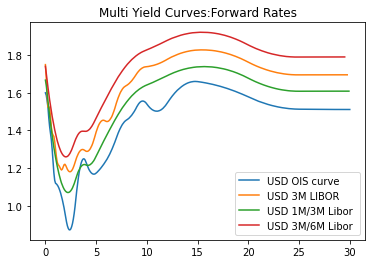

In [8]:
#get the forward rates for curve construction
forward1=forwardrates(ois_yieldCurve,DayCount,Calendar,sofr,361)
forward2=forwardrates(usdlibor3m_yieldCurve,DayCount, Calendar,libor3m,358)
forward3=forwardrates(tenor13_yieldCurve,DayCount,Calendar,libor1m,360)
forward4=forwardrates(tenor36_yieldCurve,DayCount,Calendar,libor6m,355)

plt.title('Multi Yield Curves:Forward Rates')
plt.plot(forward1["Maturities"],forward1["Curve"],label="USD OIS curve ")
plt.plot(forward2["Maturities"],forward2["Curve"],label="USD 3M LIBOR")
plt.plot(forward3["Maturities"],forward3["Curve"],label="USD 1M/3M Libor ")
plt.plot(forward4["Maturities"],forward4["Curve"],label="USD 3M/6M Libor")
plt.legend()


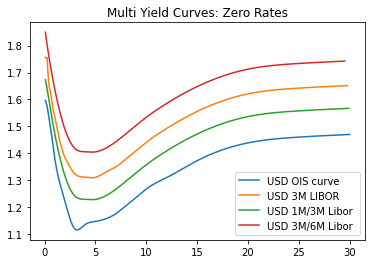

In [9]:
#get the zero rates for curve construction
zero1=zerorates(ois_yieldCurve,DayCount,Calendar,361)
zero2=zerorates(usdlibor3m_yieldCurve,DayCount, Calendar,358)
zero3=zerorates(tenor13_yieldCurve,DayCount,Calendar,360)
zero4=zerorates(tenor36_yieldCurve,DayCount,Calendar,355)

plt.title('Multi Yield Curves: Zero Rates')
plt.plot(zero1["Maturities"],zero1["Curve"],label="USD OIS curve ")
plt.plot(zero2["Maturities"],zero2["Curve"],label="USD 3M LIBOR")
plt.plot(zero3["Maturities"],zero3["Curve"],label="USD 1M/3M Libor ")
plt.plot(zero4["Maturities"],zero4["Curve"],label="USD 3M/6M Libor")
plt.legend()


### Reimply Results

In [10]:
#reimply of OIS swap
fromCurve1=[round(100*ois_yieldCurve.forwardRate(startdates1[i],enddates1[i],DayCount,ql.Simple).rate(),2) for i in range (11)]
fromCurve1+=[round(100*ois_yieldCurve.forwardRate(startdates1[i],enddates1[i],DayCount,ql.Compounded).rate(),2) for i in range (11,26)]
rows1=['ON','TN','S/N','1W','2W','3W','1M','2M','3M','6M','9M','1Y','2Y','3Y','4Y','5Y','6Y','7Y','8Y','9Y','10Y','12Y','15Y','20Y','25Y','30Y']
pd.DataFrame(zip(fromCurve1,oisRates),rows1, ['values from curve','input values'])

,values from curve,input values
ON,1.60,1.60
TN,1.59,1.59
S/N,1.59,1.59
1W,1.59,1.59
2W,1.59,1.59
3W,1.59,1.59
1M,1.59,1.59
2M,1.58,1.58
3M,1.57,1.57
6M,1.51,1.51


In [11]:
#reimply libor usd3m

curve_deposit=[100*usdlibor3m_yieldCurve.forwardRate(startdates2[i],enddates2[i],DayCount,ql.Simple).rate() for i in range (9)]
curve_futuresPrice=[100-100*usdlibor3m_yieldCurve.forwardRate(startdates2[i],enddates2[i],DayCount,ql.Simple).rate() for i in range(9,17)]

#setting swap engine to discounting curve
swapEngine=ql.DiscountingSwapEngine(discountingCurve)
forwardHandle=ql.YieldTermStructureHandle(usdlibor3m_yieldCurve)
libor3m=ql.USDLibor(ql.Period(3, ql.Months),forwardHandle)
FixedLegTenor=ql.Period(12,ql.Months)
FloatLegTenor=ql.Period(3, ql.Months)
FixedLegDayCount=ql.Thirty360()
FloatLegDayCount=ql.Actual360()
FixedRate=[rates2[i+17] for i in range (13) ]
curve_swap=[0 for i in range (13)]
N=100000000 #notional

for i in range(13):
    FixedLegSchedule=ql.Schedule(startdates2[i+17],enddates2[i+17],FixedLegTenor,Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False)
    FloatLegSchedule=ql.Schedule(startdates2[i+17],enddates2[i+17],FloatLegTenor,Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False)
    InterestRateSwapObj=ql.VanillaSwap(ql.VanillaSwap.Receiver,N, FixedLegSchedule,FixedRate[i]/100,FixedLegDayCount,FloatLegSchedule,libor3m,0,FloatLegDayCount)
    InterestRateSwapObj.setPricingEngine(swapEngine)
    curve_swap[i]=100*InterestRateSwapObj.fairRate()
    
fromCurve2=curve_deposit+curve_futuresPrice+curve_swap
rows2=['ON','TN','S/N','1W','2W','3W','1M','2M','3M','F1','F2','F3','F4','F5','F6','F7','F8','3Y','4Y','5Y','6Y','7Y','8Y','9Y','10Y','12Y','15Y','20Y','25Y','30Y']
pd.DataFrame(zip(fromCurve2,rates2),rows2, ['values from curve','input values'])


,values from curve,input values
ON,1.750000,1.75
TN,1.750000,1.75
S/N,1.750000,1.75
1W,1.750000,1.75
2W,1.750000,1.75
3W,1.750000,1.75
1M,1.750000,1.75
2M,1.750000,1.75
3M,1.750000,1.75
F1,98.360725,98.35


In [12]:
#reimply of 1m/3m libor
#from 0/N till 2 weeks:
r_fromCurve3=[100*tenor13_yieldCurve.forwardRate(startdates3[i],enddates3[i],DayCount,ql.Simple).rate() for i in range (5)]

#from 3Years
#setting swap engine to discounting curve
swapEngine=ql.DiscountingSwapEngine(discountingCurve)
forwardHandle=ql.YieldTermStructureHandle(tenor13_yieldCurve)
libor1m=ql.USDLibor(ql.Period(1, ql.Months),forwardHandle)
FixedLegTenor=ql.Period(12,ql.Months)
FloatLegTenor=ql.Period(1, ql.Months)
FixedLegDayCount=ql.Thirty360()
FloatLegDayCount=ql.Actual360()
FixedRate=[tenorRates13[i+5]-tenorSpreads13[i+5] for i in range(10)]
fairRates13=[0 for i in range (10)]
N=100000000 #notional

for i in range(10):
    FixedLegSchedule=ql.Schedule(startdates3[i+5],enddates3[i+5],FixedLegTenor,Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False)
    FloatLegSchedule=ql.Schedule(startdates3[i+5],enddates3[i+5],FloatLegTenor,Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False)
    InterestRateSwapObj=ql.VanillaSwap(ql.VanillaSwap.Receiver,N, FixedLegSchedule,FixedRate[i]/100,FixedLegDayCount,FloatLegSchedule,libor1m,0,FloatLegDayCount)
    InterestRateSwapObj.setPricingEngine(swapEngine)
    fairRates13[i]=InterestRateSwapObj.fairRate()



fromCurve3=[100*(tenorRates13[i]-r_fromCurve3[i]) for i in range (5)]+[100*(tenorRates13[i+5]-100*fairRates13[i]) for i in range(10)]

rows3=['ON','TN','S/N','1W','2W','3Y','4Y','5Y','7Y','10Y','12Y','15Y','20Y','25Y','30Y']
pd.DataFrame(zip(fromCurve3,tenorSpreads13),rows3, ['values from curve','input values'])

,values from curve,input values
ON,15.0,15
TN,12.0,12
S/N,10.0,10
1W,9.0,9
2W,8.0,8
3Y,8.0,8
4Y,8.0,8
5Y,8.0,8
7Y,8.0,8
10Y,8.0,8


In [13]:
#reimply of 3m/6m libor

#from 0/N till 2 weeks:
r_fromCurve4=[100*tenor36_yieldCurve.forwardRate(startdates4[i],enddates4[i],DayCount,ql.Simple).rate() for i in range (5)]

#from 3Years
#setting swap engine to discounting curve
swapEngine=ql.DiscountingSwapEngine(discountingCurve)
forwardHandle=ql.YieldTermStructureHandle(tenor36_yieldCurve)
libor6m=ql.USDLibor(ql.Period(6, ql.Months),forwardHandle)
FixedLegTenor=ql.Period(12,ql.Months)
FloatLegTenor=ql.Period(6, ql.Months)
FixedLegDayCount=ql.Thirty360()
FloatLegDayCount=ql.Actual360()
FixedRate=[tenorRates36[i+5]-tenorSpreads36[i+5] for i in range(10)]
fairRates36=[0 for i in range (10)]
N=100000000 #notional

for i in range(10):
    FixedLegSchedule=ql.Schedule(startdates4[i+5],enddates4[i+5],FixedLegTenor,Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False)
    FloatLegSchedule=ql.Schedule(startdates4[i+5],enddates4[i+5],FloatLegTenor,Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False)
    InterestRateSwapObj=ql.VanillaSwap(ql.VanillaSwap.Receiver,N, FixedLegSchedule,FixedRate[i]/100,FixedLegDayCount,FloatLegSchedule,libor6m,0,FloatLegDayCount)
    InterestRateSwapObj.setPricingEngine(swapEngine)
    fairRates36[i]=InterestRateSwapObj.fairRate()



fromCurve4=[100*(r_fromCurve4[i]-tenorRates36[i]) for i in range (5)]+[100*(100*fairRates36[i]-tenorRates36[i+5]) for i in range(10)]
rows4=['ON','TN','S/N','1W','2W','3Y','4Y','5Y','7Y','10Y','12Y','15Y','20Y','25Y','30Y']
pd.DataFrame(zip(fromCurve4,tenorSpreads36),rows4, ['values from curve','input values'])



,values from curve,input values
ON,20.0,20
TN,15.0,15
S/N,12.0,12
1W,11.0,11
2W,10.0,10
3Y,10.0,10
4Y,10.0,10
5Y,10.0,10
7Y,10.0,10
10Y,10.0,10


#### results show consistency for all yield curve inputs

In [14]:
ois_yieldCurve.nodes()

((Date(7,2,2022), 1.0),
 (Date(8,2,2022), 0.9999555575307765),
 (Date(9,2,2022), 0.9999113947775073),
 (Date(10,2,2022), 0.9998672339746736),
 (Date(16,2,2022), 0.999602351050647),
 (Date(23,2,2022), 0.9992934982977285),
 (Date(2,3,2022), 0.9989848363418018),
 (Date(9,3,2022), 0.9986763650061181),
 (Date(11,4,2022), 0.9972415575187945),
 (Date(9,5,2022), 0.9960453554022198),
 (Date(9,8,2022), 0.9923773212863738),
 (Date(9,11,2022), 0.9890361184582885),
 (Date(9,2,2023), 0.986114016167933),
 (Date(9,2,2024), 0.9756455191915195),
 (Date(10,2,2025), 0.9665981228203128),
 (Date(9,2,2026), 0.9549953301254754),
 (Date(9,2,2027), 0.9435992247090285),
 (Date(9,2,2028), 0.9321464753959886),
 (Date(9,2,2029), 0.9199418786462012),
 (Date(11,2,2030), 0.9067240621799968),
 (Date(10,2,2031), 0.8932147049674208),
 (Date(9,2,2032), 0.8793416101195723),
 (Date(9,2,2034), 0.8526863860656468),
 (Date(9,2,2037), 0.8115206594135843),
 (Date(10,2,2042), 0.7472250652349682),
 (Date(11,2,2047), 0.691217114133

In [15]:
usdlibor3m_yieldCurve.nodes()

((Date(7,2,2022), 1.0),
 (Date(8,2,2022), 0.9999513912518141),
 (Date(9,2,2022), 0.9999027848664386),
 (Date(10,2,2022), 0.9998541808437587),
 (Date(16,2,2022), 0.9995626559071368),
 (Date(23,2,2022), 0.9992227582670627),
 (Date(2,3,2022), 0.9988830917103184),
 (Date(9,3,2022), 0.9985436560013269),
 (Date(11,4,2022), 0.9969465613823395),
 (Date(9,5,2022), 0.9955954517660893),
 (Date(16,6,2022), 0.9940142551174482),
 (Date(15,9,2022), 0.9901831792359728),
 (Date(21,12,2022), 0.986447919643754),
 (Date(21,3,2023), 0.9831053614152317),
 (Date(15,6,2023), 0.9801887333682799),
 (Date(21,9,2023), 0.9769691952881812),
 (Date(20,12,2023), 0.9740715044585947),
 (Date(20,3,2024), 0.9710768114690972),
 (Date(10,2,2025), 0.960626706778644),
 (Date(9,2,2026), 0.9482985913666825),
 (Date(9,2,2027), 0.9358079020450478),
 (Date(9,2,2028), 0.9223477225191123),
 (Date(9,2,2029), 0.9087067975385668),
 (Date(11,2,2030), 0.8940819260508346),
 (Date(10,2,2031), 0.8792376600246742),
 (Date(9,2,2032), 0.86408

In [16]:
tenor13_yieldCurve.nodes()

((Date(7,2,2022), 1.0),
 (Date(8,2,2022), 0.9999555575307765),
 (Date(9,2,2022), 0.9999102838151481),
 (Date(10,2,2022), 0.9998644566942163),
 (Date(16,2,2022), 0.9995876391382841),
 (Date(23,2,2022), 0.9992613191028968),
 (Date(10,2,2025), 0.9630325864486515),
 (Date(9,2,2026), 0.9514653660351319),
 (Date(9,2,2027), 0.9397156909030367),
 (Date(9,2,2029), 0.9140300217096922),
 (Date(9,2,2032), 0.8713799728322577),
 (Date(9,2,2034), 0.842432908289624),
 (Date(9,2,2037), 0.7994882877830285),
 (Date(10,2,2042), 0.7326340403943324),
 (Date(11,2,2047), 0.6744461820868358),
 (Date(9,2,2052), 0.6216845941392642))

In [17]:
tenor36_yieldCurve.nodes()

((Date(7,2,2022), 1.0),
 (Date(8,2,2022), 0.9999458362672021),
 (Date(9,2,2022), 0.9998930641332672),
 (Date(10,2,2022), 0.9998411279413503),
 (Date(16,2,2022), 0.9995315668832445),
 (Date(23,2,2022), 0.9991742137961193),
 (Date(10,2,2025), 0.9578808984695454),
 (Date(9,2,2026), 0.9446943713194293),
 (Date(9,2,2027), 0.9313676730031797),
 (Date(9,2,2029), 0.9026951092095963),
 (Date(9,2,2032), 0.8560029480148795),
 (Date(9,2,2034), 0.824639250814701),
 (Date(9,2,2037), 0.7784503224757897),
 (Date(10,2,2042), 0.7070567642334014),
 (Date(11,2,2047), 0.645148841035893),
 (Date(9,2,2052), 0.5894321190505964))

## Portfolio and Risk Report

In [18]:
FRA1_pre=ql.ForwardRateAgreement(Calendar.advance(SpotDate,9,ql.Months),Calendar.advance(SpotDate,12,ql.Months), ql.Position.Long, 0.01, 200000000,ql.USDLibor(ql.Period('3M'),ql.YieldTermStructureHandle(usdlibor3m_yieldCurve)) , discountingCurve)
rate1=FRA1_pre.forwardRate().rate()
FRA2_pre=ql.ForwardRateAgreement(Calendar.advance(SpotDate,6,ql.Months),Calendar.advance(SpotDate,12,ql.Months), ql.Position.Short, 0.01, 150000000,ql.USDLibor(ql.Period('3M'),ql.YieldTermStructureHandle(usdlibor3m_yieldCurve)) , discountingCurve)
rate2=FRA2_pre.forwardRate().rate()
SWAP1_pre=ql.VanillaSwap(ql.VanillaSwap.Payer, 300000000, ql.Schedule(Calendar.advance(SpotDate,10,ql.Years),Calendar.advance(SpotDate,20,ql.Years), ql.Period(12,ql.Months),Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False), 0.1, ql.Thirty360(), ql.Schedule(Calendar.advance(SpotDate,10,ql.Years),Calendar.advance(SpotDate,20,ql.Years), ql.Period(3,ql.Months),Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False), ql.USDLibor(ql.Period(3, ql.Months),ql.YieldTermStructureHandle(usdlibor3m_yieldCurve)), 0, ql.Actual360())
SWAP1_pre.setPricingEngine(ql.DiscountingSwapEngine(discountingCurve))
rate3=SWAP1_pre.fairRate()
SWAP2_pre=ql.VanillaSwap(ql.VanillaSwap.Receiver, 100000000,ql.Schedule(Calendar.advance(SpotDate,5,ql.Years),Calendar.advance(SpotDate,10,ql.Years), ql.Period(12,ql.Months),Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False), 0.1, ql.Thirty360(),ql.Schedule(Calendar.advance(SpotDate,5,ql.Years),Calendar.advance(SpotDate,10,ql.Years), ql.Period(3,ql.Months),Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False), ql.USDLibor(ql.Period(3, ql.Months),ql.YieldTermStructureHandle(usdlibor3m_yieldCurve)), 0,ql.Actual360())
SWAP2_pre.setPricingEngine(ql.DiscountingSwapEngine(discountingCurve))
rate4=SWAP2_pre.fairRate()
FRA1=ql.ForwardRateAgreement(Calendar.advance(SpotDate,9,ql.Months),Calendar.advance(SpotDate,12,ql.Months), ql.Position.Long, rate1, 200000000,ql.USDLibor(ql.Period('3M'),ql.YieldTermStructureHandle(usdlibor3m_yieldCurve)) , discountingCurve)
FRA2=ql.ForwardRateAgreement(Calendar.advance(SpotDate,6,ql.Months),Calendar.advance(SpotDate,12,ql.Months), ql.Position.Short, rate2, 150000000,ql.USDLibor(ql.Period('3M'),ql.YieldTermStructureHandle(usdlibor3m_yieldCurve)) , discountingCurve)
SWAP1=ql.VanillaSwap(ql.VanillaSwap.Payer, 300000000, ql.Schedule(Calendar.advance(SpotDate,10,ql.Years),Calendar.advance(SpotDate,20,ql.Years), ql.Period(12,ql.Months),Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False), rate3, ql.Thirty360(), ql.Schedule(Calendar.advance(SpotDate,10,ql.Years),Calendar.advance(SpotDate,20,ql.Years), ql.Period(3,ql.Months),Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False), ql.USDLibor(ql.Period(3, ql.Months),ql.YieldTermStructureHandle(usdlibor3m_yieldCurve)), 0, ql.Actual360())
SWAP2=ql.VanillaSwap(ql.VanillaSwap.Receiver, 100000000, ql.Schedule(Calendar.advance(SpotDate,5,ql.Years),Calendar.advance(SpotDate,10,ql.Years), ql.Period(12,ql.Months),Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False), rate4,ql.Thirty360(), ql.Schedule(Calendar.advance(SpotDate,5,ql.Years),Calendar.advance(SpotDate,10,ql.Years), ql.Period(3,ql.Months),Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False), ql.USDLibor(ql.Period(3, ql.Months),ql.YieldTermStructureHandle(usdlibor3m_yieldCurve)), 0, ql.Actual360())

### ATM rates for FRAs and SWAPs

In [19]:
print('ATM rate of USD 200m of a 9x12 ATM Payer FRA: ',rate1*100)
print('ATM rate of USD 150m of a 6x12 ATM Receiver FRA: ',rate2*100)
print('ATM rate of USD 300m of a 10y 10y ATM forward starting Payer swap: ',rate3*100)
print('ATM rate of USD 100m of a 5y 5y ATM forward starting Receiver swap: ',rate4*100)

ATM rate of USD 200m of a 9x12 ATM Payer FRA:  1.3754588413269921
ATM rate of USD 150m of a 6x12 ATM Receiver FRA:  1.4699997573426133
ATM rate of USD 300m of a 10y 10y ATM forward starting Payer swap:  1.8347818124761883
ATM rate of USD 100m of a 5y 5y ATM forward starting Receiver swap:  1.60414005842099


In [20]:
schedule1=ql.Schedule(SpotDate ,Calendar.advance(SpotDate,5,ql.Years),ql.Period('3M'),Calendar,
                              ql.ModifiedFollowing, ql.ModifiedFollowing,
                               ql.DateGeneration.Forward, MonthEndFlag)
schedule2=ql.Schedule(SpotDate ,Calendar.advance(SpotDate,5,ql.Years),ql.Period('1Y'),Calendar,
                             ql.ModifiedFollowing, ql.ModifiedFollowing,
                              ql.DateGeneration.Forward, MonthEndFlag)
index1=ql.USDLibor(ql.Period('3M'),ql.YieldTermStructureHandle(usdlibor3m_yieldCurve))
index2=ql.OvernightIndex('USDOIS', 2, ql.USDCurrency(), Calendar, DayCount,discountingCurve)


def basisFairValue(spread):
    basisSwap = ql.FloatFloatSwap(ql.VanillaSwap.Payer,[100000000]*(len(schedule1)-1),[100000000]*(len(schedule2)-1),
                                  schedule1,index1,ql.Actual360(),schedule2,index2,ql.Actual360(),False,False,
                                 [1]*(len(schedule1)-1),[spread]*(len(schedule1)-1))
    
    basisSwap.setPricingEngine(ql.DiscountingSwapEngine(discountingCurve))
    return basisSwap.NPV()
    
accuracy = 0.000001
guess = -0.0002
step = 0.00001
fairSpread = ql.Brent().solve(basisFairValue, accuracy, guess, step)

SWAP5=ql.FloatFloatSwap(ql.VanillaSwap.Payer,[100000000]*(len(schedule1)-1),[100000000]*(len(schedule2)-1), schedule1,index1,DayCount,schedule2,index2,DayCount,False,False,[1]*(len(schedule1)-1),[fairSpread]*(len(schedule1)-1))

### fair spread of basis swap

In [21]:
print("fair spread of USD 100m of a 5y Pay LIBOR 3m versus Receive OIS tenor basis swap + Spread: ",fairSpread*10000)

fair spread of USD 100m of a 5y Pay LIBOR 3m versus Receive OIS tenor basis swap + Spread:  -16.411841087680862


## Risk Report

In [22]:
class RiskReport(object):
     def __init__(self,
                 ToChangeInputName,
                 ToChangeInputIndex,shift,rate1,rate2,rate3,rate4,fairSpread):
            self.ToChangeInputName=ToChangeInputName
            self.ToChangeInputIndex=ToChangeInputIndex
            self.shift=shift
            self.inputs=dict(oisRates=[1.6,1.59,1.59,1.59,1.59,1.59,1.59,1.58,1.57,1.51,1.45,1.38,1.22,1.12,1.14,1.15,1.16,1.18,1.21,1.24,1.27,1.31,1.37,1.43,1.45,1.46],
                           rates2=[1.75, 1.75, 1.75,1.75,1.75,1.75,1.75,1.75,1.75,98.35, 98.47 ,98.60, 98.64, 98.75, 98.79,98.81, 98.78,1.34,1.33,1.33,1.35,1.37,1.4,1.43,1.46,1.51,1.57,1.63,1.65,1.66],
                           tenorSpreads13=[15,12,10,9,8,8,8,8,8,8,8,8,8,8,8],
                           tenorSpreads36=[20,15,12,11,10,10,10,10,10,10,10,10,10,10,10])
            if self.ToChangeInputName=='oisRates' or self.ToChangeInputName=='rates2':
                self.inputs[self.ToChangeInputName][ self.ToChangeInputIndex]+=self.shift/100
            else:
                self.inputs[self.ToChangeInputName][ self.ToChangeInputIndex]+=self.shift
         
            self.Calendar = ql.UnitedStates()
            self.DayCount=ql.Actual360()
            self.SwapDayCount=ql.Thirty360()
            self.Freq=ql.Semiannual
            self.BusDayConv = ql.ModifiedFollowing
            self.DateGeneration = ql.DateGeneration.Backward
            self.MonthEndFlag = False
            self.EvaluationDate = ql.Date(7,2, 2022)
            self.SpotDate=ql.Date(9,2,2022)
            ql.Settings.instance().evaluationDate = self.EvaluationDate
            self.libor3m=ql.USDLibor(ql.Period(3, ql.Months))
            self.libor6m=ql.USDLibor(ql.Period(6, ql.Months))
            self.libor1m=ql.USDLibor(ql.Period(1, ql.Months))
            self.sofr = ql.OvernightIndex("SOFR", 2, ql.USDCurrency(), self.Calendar, self.DayCount)
            self.oisRates=self.inputs['oisRates']
            self.oisPeriods=[ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Weeks),ql.Period(2,Weeks),ql.Period(3,Weeks), ql.Period(1,Months),ql.Period(2,Months),ql.Period(3,Months),ql.Period(6,Months),ql.Period(9,Months),
                              ql.Period(1,Years),ql.Period(2,Years),ql.Period(3,Years),ql.Period(4,Years),ql.Period(5,Years),ql.Period(6,Years),ql.Period(7,Years),ql.Period(8,Years),ql.Period(9,Years),ql.Period(10,Years),ql.Period(12,Years),
                              ql.Period(15,Years),ql.Period(20,Years),ql.Period(25,Years),ql.Period(30,Years)]
            self.startdates1=[self.Calendar.advance(self.EvaluationDate,0,ql.Days), self.Calendar.advance(self.EvaluationDate,1,ql.Days),self.Calendar.advance(self.EvaluationDate,2,ql.Days)]
            self.startdates1+=[self.Calendar.advance(self.EvaluationDate,2,ql.Days) for i in range(3,26)]
            self.enddates1=[self.Calendar.advance(self.startdates1[i],self.oisPeriods[i]) for i in range(26)]
            self.helpers1=[ DepositRateHelper(QuoteHandle(SimpleQuote(self.oisRates[i]/100)),self.oisPeriods[i], i,TARGET(), ql.Following, False, self.DayCount)   for i in range(3)]
            self.helpers1+=[OISRateHelper(2, self.oisPeriods[i],QuoteHandle(SimpleQuote(self.oisRates[i]/100)), self.sofr,paymentFrequency=ql.Once) for  i in range(3,11)]
            self.helpers1+=[ OISRateHelper(2, self.oisPeriods[i],QuoteHandle(SimpleQuote(self.oisRates[i]/100)), self.sofr,paymentFrequency=ql.Annual) for i in range(11,26) ]
            self.ois_yieldCurve=ql.PiecewiseLogCubicDiscount(self.EvaluationDate,self.helpers1,self.DayCount)
            
            
            self.futures_startDate=[ql.IMM.date('H2',ql.Date(7,2,2022)),ql.IMM.date('M2',ql.Date(7,2,2022)),ql.IMM.date('U2',ql.Date(7,2,2022)),ql.IMM.date('Z2',ql.Date(7,2,2022)),
           ql.IMM.date('H3',ql.Date(7,2,2022)),ql.IMM.date('M3',ql.Date(7,2,2022)),ql.IMM.date('U3',ql.Date(7,2,2022)),ql.IMM.date('Z3',ql.Date(7,2,2022))]
            self.rates2=self.inputs['rates2']
            self.periods2=[ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Weeks),ql.Period(2,Weeks),ql.Period(3,Weeks),ql.Period(1,Months),ql.Period(2,Months),ql.Period(3,Months),ql.Period(3,Months),ql.Period(3,Months),ql.Period(3,Months),ql.Period(3,Months),ql.Period(3,Months),ql.Period(3,Months),ql.Period(3,Months),ql.Period(3,Months),
          ql.Period(3,Years),ql.Period(4,Years),ql.Period(5,Years),ql.Period(6,Years),ql.Period(7,Years),ql.Period(8,Years),ql.Period(9,Years),ql.Period(10,Years),ql.Period(12,Years),ql.Period(15,Years),ql.Period(20,Years),ql.Period(25,Years),ql.Period(30,Years)]

            self.startdates2=[self.Calendar.advance(self.EvaluationDate,0,ql.Days), self.Calendar.advance(self.EvaluationDate,1,ql.Days),self.Calendar.advance(self.EvaluationDate,2,ql.Days)]
            self.startdates2+=[self.Calendar.advance(self.EvaluationDate,2,ql.Days) for i in range(3,9)]
            self.startdates2+=[self.Calendar.advance(self.futures_startDate[i],2,ql.Days) for i in range(8)]
            self.startdates2+=[self.Calendar.advance(self.EvaluationDate,2,ql.Days) for i in range(13)]
            self.enddates2=[self.Calendar.advance(self.startdates2[i],self.periods2[i]) for i in range(30)]
            self.discountingCurve=YieldTermStructureHandle(self.ois_yieldCurve)
            self.helpers2=[ql.DepositRateHelper(QuoteHandle(SimpleQuote(self.rates2[i]/100)),self.periods2[i], i,TARGET(), ql.Following, self.MonthEndFlag, self.DayCount) for i in range(3)]
            self.helpers2+=[ql.DepositRateHelper(QuoteHandle(SimpleQuote(self.rates2[i]/100)), self.periods2[i], 2, ql.TARGET(), ql.Following,self.MonthEndFlag, self.DayCount) for  i in range(3,9)]
            self.helpers2+=[ql.FuturesRateHelper(self.rates2[i+9], self.futures_startDate[i], self.libor3m, 0,  ql.Futures.IMM) for i in range(8) ]
            self.helpers2+=[ql.SwapRateHelper(QuoteHandle(SimpleQuote(self.rates2[i+17]/100)), self.periods2[i+17], self.Calendar, self.Freq, self.BusDayConv, self.SwapDayCount,
                             self.libor3m,ql.QuoteHandle(),ql.Period(0,ql.Days), self.discountingCurve) for i in range(13)]
            self.usdlibor3m_yieldCurve=ql.PiecewiseLogCubicDiscount(self.EvaluationDate,self.helpers2,self.DayCount)
            
            self.tenorRates13=[self.inputs['rates2'][i] for i in range(9)]+[self.inputs['rates2'][i] for i in range(17,30)]
            self.tenorSpreads13=self.inputs['tenorSpreads13']
            self.tenorPeriods13=[ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Weeks),ql.Period(2,Weeks),
                              ql.Period(3,Years),ql.Period(4,Years),ql.Period(5,Years),ql.Period(7,Years),ql.Period(10,Years),
                              ql.Period(12,Years),ql.Period(15,Years),ql.Period(20,Years),ql.Period(25,Years),ql.Period(30,Years)]
            self.startdates3=[self.Calendar.advance(self.EvaluationDate,0,ql.Days), self.Calendar.advance(self.EvaluationDate,1,ql.Days),self.Calendar.advance(self.EvaluationDate,2,ql.Days)]
            self.startdates3+=[self.Calendar.advance(self.EvaluationDate,2,ql.Days) for i in range(3,15)]
            self.enddates3=[self.Calendar.advance(self.startdates3[i],self.tenorPeriods13[i]) for i in range(15)]
            self.helpers3=[ql.DepositRateHelper(QuoteHandle(SimpleQuote(self.tenorRates13[i]/100-self.tenorSpreads13[i]/10000)),ql.Period(1,Days), i, TARGET(), ql.Following, self.MonthEndFlag, self.DayCount) for i in range(3)]
            self.helpers3+=[ql.SwapRateHelper(QuoteHandle(SimpleQuote(self.tenorRates13[i]/100-self.tenorSpreads13[i]/10000)), self.tenorPeriods13[i], self.Calendar,ql.Annual, self.BusDayConv, self.SwapDayCount,
                          self.libor1m,ql.QuoteHandle(),ql.Period(0,ql.Days), self.discountingCurve)   for i in range(3,15)]
            self.tenor13_yieldCurve=ql.PiecewiseLogCubicDiscount(self.EvaluationDate,self.helpers3,self.DayCount)
            
            self.tenorRates36=[self.inputs['rates2'][i] for i in range(9)]+[self.inputs['rates2'][i] for i in range(17,30)]
            self.tenorSpreads36=self.inputs['tenorSpreads36']
            self.tenorPeriods36=[ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Days),ql.Period(1,Weeks),ql.Period(2,Weeks),
                              ql.Period(3,Years),ql.Period(4,Years),ql.Period(5,Years),ql.Period(7,Years),ql.Period(10,Years),
                              ql.Period(12,Years),ql.Period(15,Years),ql.Period(20,Years),ql.Period(25,Years),ql.Period(30,Years)]
            self.startdates4=[self.Calendar.advance(self.EvaluationDate,0,ql.Days), self.Calendar.advance(self.EvaluationDate,1,ql.Days),self.Calendar.advance(self.EvaluationDate,2,ql.Days)]
            self.startdates4+=[self.Calendar.advance(self.EvaluationDate,2,ql.Days) for i in range(3,15)]
            self.enddates4=[self.Calendar.advance(self.startdates4[i],self.tenorPeriods36[i]) for i in range(15)]
            self.helpers4=[ql.DepositRateHelper(QuoteHandle(SimpleQuote(self.tenorRates36[i]/100+self.tenorSpreads36[i]/10000)),ql.Period(1,Days), i, TARGET(), ql.Following, self.MonthEndFlag, self.DayCount) for i in range(3)]
            self.helpers4+=[ql.SwapRateHelper(QuoteHandle(SimpleQuote(self.tenorRates36[i]/100+self.tenorSpreads36[i]/10000)), self.tenorPeriods36[i], self.Calendar, ql.Annual, self.BusDayConv, self.SwapDayCount,
                          self.libor6m,ql.QuoteHandle(),ql.Period(0,ql.Days), self.discountingCurve) for i in range(3,15)]
            self.tenor36_yieldCurve=ql.PiecewiseLogCubicDiscount(self.EvaluationDate,self.helpers4,self.DayCount)
            
            
            
            self.rate1=rate1
            self.rate2=rate2
            self.rate3=rate3
            self.rate4=rate4
            self.FRA1=ql.ForwardRateAgreement(self.Calendar.advance(self.SpotDate,9,ql.Months),self.Calendar.advance(self.SpotDate,12,ql.Months), ql.Position.Long, self.rate1, 200000000,ql.USDLibor(ql.Period('3M'),ql.YieldTermStructureHandle(self.usdlibor3m_yieldCurve)) , self.discountingCurve)
            self.FRA2=ql.ForwardRateAgreement(self.Calendar.advance(self.SpotDate,6,ql.Months),self.Calendar.advance(self.SpotDate,12,ql.Months), ql.Position.Short, self.rate2, 150000000,ql.USDLibor(ql.Period('3M'),ql.YieldTermStructureHandle(self.usdlibor3m_yieldCurve)) , self.discountingCurve)
            self.SWAP1=ql.VanillaSwap(ql.VanillaSwap.Payer, 300000000, ql.Schedule(self.Calendar.advance(self.SpotDate,10,ql.Years),self.Calendar.advance(self.SpotDate,20,ql.Years), ql.Period(12,ql.Months),self.Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False), self.rate3, ql.Thirty360(), ql.Schedule(self.Calendar.advance(self.SpotDate,10,ql.Years),self.Calendar.advance(self.SpotDate,20,ql.Years), ql.Period(3,ql.Months),self.Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False), ql.USDLibor(ql.Period(3, ql.Months),ql.YieldTermStructureHandle(self.usdlibor3m_yieldCurve)), 0, ql.Actual360())
            self.SWAP2=ql.VanillaSwap(ql.VanillaSwap.Receiver, 100000000, ql.Schedule(self.Calendar.advance(self.SpotDate,5,ql.Years),self.Calendar.advance(self.SpotDate,10,ql.Years), ql.Period(12,ql.Months),self.Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False), self.rate4,ql.Thirty360(), ql.Schedule(self.Calendar.advance(self.SpotDate,5,ql.Years),self.Calendar.advance(self.SpotDate,10,ql.Years), ql.Period(3,ql.Months),self.Calendar,ql.ModifiedFollowing,ql.ModifiedFollowing,ql.DateGeneration.Forward, False), ql.USDLibor(ql.Period(3, ql.Months),ql.YieldTermStructureHandle(self.usdlibor3m_yieldCurve)), 0, ql.Actual360())
            
            
            self.fairSpread=fairSpread
            self.schedule1=ql.Schedule(self.SpotDate ,self.Calendar.advance(self.SpotDate,5,ql.Years),ql.Period('3M'),self.Calendar,
                              ql.ModifiedFollowing, ql.ModifiedFollowing,
                               ql.DateGeneration.Forward, self.MonthEndFlag)
            self.schedule2=ql.Schedule(self.SpotDate ,self.Calendar.advance(self.SpotDate,5,ql.Years),ql.Period('1Y'),self.Calendar,
                             ql.ModifiedFollowing, ql.ModifiedFollowing,
                              ql.DateGeneration.Forward, self.MonthEndFlag)
            self.index1=ql.USDLibor(ql.Period('3M'),ql.YieldTermStructureHandle(self.usdlibor3m_yieldCurve))
            self.index2=ql.OvernightIndex('USDOIS', 2, ql.USDCurrency(), self.Calendar, self.DayCount,self.discountingCurve)
            
            
            
            
            self.SWAP5=ql.FloatFloatSwap(ql.VanillaSwap.Payer,[100000000]*(len(self.schedule1)-1),[100000000]*(len(self.schedule2)-1), self.schedule1,self.index1,self.DayCount,self.schedule2,self.index2,self.DayCount,False,False,[1]*(len(self.schedule1)-1),[self.fairSpread]*(len(self.schedule1)-1))
            
            
            self.FRA1.setPricingEngine(ql.DiscountingSwapEngine(self.discountingCurve))
            self.FRA2.setPricingEngine(ql.DiscountingSwapEngine(self.discountingCurve))
            self.SWAP1.setPricingEngine(ql.DiscountingSwapEngine(self.discountingCurve))
            self.SWAP2.setPricingEngine(ql.DiscountingSwapEngine(self.discountingCurve))
            self.SWAP5.setPricingEngine(ql.DiscountingSwapEngine(self.discountingCurve))
            self.NPV=self.FRA1.NPV()+self.FRA2.NPV()+self.SWAP1.NPV()+self.SWAP2.NPV()+self.SWAP5.NPV()

### check consistency

In [23]:
check=[]
inputsNames=['oisRates','rates2','tenorSpreads13','tenorSpreads36']
inputs=dict(oisRates=[1.6,1.59,1.59,1.59,1.59,1.59,1.59,1.58,1.57,1.51,1.45,1.38,1.22,1.12,1.14,1.15,1.16,1.18,1.21,1.24,1.27,1.31,1.37,1.43,1.45,1.46],
                           rates2=[1.75, 1.75, 1.75,1.75,1.75,1.75,1.75,1.75,1.75,98.35, 98.47 ,98.60, 98.64, 98.75, 98.79,98.81, 98.78,1.34,1.33,1.33,1.35,1.37,1.4,1.43,1.46,1.51,1.57,1.63,1.65,1.66],
                           tenorSpreads13=[15,12,10,9,8,8,8,8,8,8,8,8,8,8,8],
                           tenorSpreads36=[20,15,12,11,10,10,10,10,10,10,10,10,10,10,10])
for i in range(len(inputsNames)):
    for j in range(len(inputs[inputsNames[i]])):
        change=RiskReport(inputsNames[i],j,0,rate1,rate2,rate3,rate4,fairSpread).NPV
        check.append(abs(change))
max(check)

1.0989606380462646e-07

#### The maximum absolute change in portfolio NPV is near zero when we change each yield inputs by zero (we owe the bias to precision loss in calculation), which indicates that the output is consistent. Now we use the previous work to produce risk report

In [24]:
changes=[]
for i in range(len(inputsNames)):
    for j in range(len(inputs[inputsNames[i]])):
        change=RiskReport(inputsNames[i],j,1,rate1,rate2,rate3,rate4,fairSpread).NPV
        changes.append(change)


In [25]:
changes1=[changes[i] for i in range(len(rows1))]
changes2=[changes[i+len(rows1)] for i in range(len(rows2))]
changes3=[changes[i+len(rows1)+len(rows2)] for i in range(len(rows3))]
changes4=[changes[i+len(rows1)+len(rows2)+len(rows3)] for i in range(len(rows4))]

### sensitivity of oisCurve

In [26]:
pd.DataFrame(zip(changes1),rows1, ['sensitivity'])

,sensitivity
ON,-0.000008
TN,0.000037
S/N,-0.000206
1W,0.001563
2W,-0.010414
3W,0.057785
1M,-0.094917
2M,0.373953
3M,-1.806758
6M,24.691919


### sensitivity of Libor3MCurve

In [27]:
pd.DataFrame(zip(changes2),rows2, ['sensitivity'])

,sensitivity
ON,0.075174
TN,-0.375873
S/N,2.046419
1W,-15.523180
2W,103.374663
3W,-573.622949
1M,1512.208074
2M,1652.792591
3M,-5289.784210
F1,-3818.505362


# sensitivity of Libor1MCurve

In [28]:
pd.DataFrame(zip(changes3),rows3, ['sensitivity'])

,sensitivity
ON,1.098961e-07
TN,1.098961e-07
S/N,1.098961e-07
1W,1.098961e-07
2W,1.098961e-07
3Y,1.098961e-07
4Y,1.098961e-07
5Y,1.098961e-07
7Y,1.098961e-07
10Y,1.098961e-07


# sensitivity of Libor6MCurve

In [29]:
pd.DataFrame(zip(changes4),rows4, ['sensitivity'])

,sensitivity
ON,1.098961e-07
TN,1.098961e-07
S/N,1.098961e-07
1W,1.098961e-07
2W,1.098961e-07
3Y,1.098961e-07
4Y,1.098961e-07
5Y,1.098961e-07
7Y,1.098961e-07
10Y,1.098961e-07


# The sensitivity  for Libor1MCurve and Libor3MCurve are zero